In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("laptopData.csv", index_col=0)
data["ssd"] = data["ssd"].map({"SSD": 1, "No": 0})
data["BIN"] = data["BIN"].map({False: 0, True: 1})
data["sale"] = data["sale"].map({"SOLD": 1, "NOT SOLD": 0})
# data["ghz"] = data["ghz"].astype("category")
# data["ram"] = data["ram"].astype("category")
# data["hd"] = data["hd"].astype("category")
data

,sale,price,ghz,ram,hd,ssd,BIN
1,1,404.99,2.7,8.0,NaN,1,0
2,1,355.00,2.5,8.0,128.0,1,0
3,1,449.99,2.6,4.0,128.0,0,1
4,0,499.99,2.5,4.0,320.0,0,1
5,0,199.99,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...
216,1,480.00,NaN,6.0,128.0,1,1
217,1,452.00,2.6,8.0,240.0,1,0
218,1,358.00,2.6,4.0,128.0,0,0
219,1,450.00,NaN,4.0,128.0,1,0


In [59]:
data.isna().sum()

sale      0
price     0
ghz      49
ram      43
hd       70
ssd       0
BIN       0
dtype: int64

In [68]:
data[data["ssd"] == 1]["hd"].mode()

0    128.0
dtype: float64

In [69]:
data[data["ssd"] == 0]["hd"].mode()

0    320.0
dtype: float64

In [73]:
data["hd"].fillna(data["ssd"].map({1: 128, 0: 320}), inplace=True)
data.isna().sum()

sale      0
price     0
ghz      49
ram      43
hd        0
ssd       0
BIN       0
dtype: int64

In [75]:
data.groupby("ghz")["ram"].agg(pd.Series.mode)

ghz
2.5    4.0
2.6    4.0
2.7    8.0
2.8    8.0
3.2    8.0
Name: ram, dtype: float64

In [76]:
data.groupby("ram")["ghz"].agg(pd.Series.mode)

ram
2.0     2.5
3.0     2.5
4.0     2.5
6.0     2.6
8.0     2.5
12.0     []
16.0     []
Name: ghz, dtype: object

In [93]:
imputed_data_ram = data["ram"].fillna(data["ghz"].map({2.5: 4, 2.6: 4, 2.7: 8, 2.8: 8, 3.2: 8, pd.NA: 4}))
imputed_data_ghz = data["ghz"].fillna(2.5)
data["ram"] = imputed_data_ram
data["ghz"] = imputed_data_ghz
data.isna().sum()

sale     0
price    0
ghz      0
ram      0
hd       0
ssd      0
BIN      0
dtype: int64

In [129]:
# cor = data.corr().applymap('{:,.2f}'.format).applymap(float)
corr = data.corr()#.style.background_gradient(cmap='coolwarm').set_precision(2)
# cor.columns = ["Sold", "Sale/Listing Price", "GHz", "RAM", "Harddisk Space", "SSD", "Buy-It-Now"]
# cor.index = cor.columns
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,sale,price,ghz,ram,hd,ssd,BIN
sale,nan,nan,nan,nan,nan,nan,nan
price,-0.03,nan,nan,nan,nan,nan,nan
ghz,0.04,0.18,nan,nan,nan,nan,nan
ram,0.04,0.27,0.27,nan,nan,nan,nan
hd,-0.12,-0.29,-0.15,-0.19,nan,nan,nan
ssd,0.18,0.44,0.16,0.34,-0.66,nan,nan
BIN,-0.23,0.17,-0.01,-0.08,-0.08,-0.02,nan


In [91]:
data["ram"].value_counts()

4.0     106
8.0      72
6.0      16
3.0       3
2.0       2
16.0      1
12.0      1
Name: ram, dtype: int64

In [25]:
data["ghz"].isna().sum()

49

In [26]:
data["ram"].isna().sum()

43

In [27]:
data["hd"].isna().sum()

70

In [28]:
data["ssd"].isna().sum()

0

In [7]:
data["hd"].value_counts()

128.0    57
320.0    27
160.0    24
300.0    10
500.0     7
120.0     7
240.0     4
256.0     3
130.0     2
119.0     2
80.0      2
180.0     2
512.0     1
250.0     1
150.0     1
Name: hd, dtype: int64

I'd like you to help me understand what goes into a laptop price generally.  Because of my major, I need a lot of hard drive space and would prefer a solid state drive.  Does the increase in price differ by solid state or not?  Does the cost of storage differ by solid state or not?

Of the laptops that have not yet sold, I'd like you to make a few recommendations for good deals that I should consider.  I would prefer a BIN listing (buy it now) rather than wait for the auction to end (or get into a bidding war) but only if it does not affect the price.  Does BIN affect price?  

Finally, I'm not majoring in a quantitative field and really have no statistics background, so I may need you to explain your models to me.  And, I'm definitely a very visual person so a few clear graphics would go a long way to helping me understand your analysis.

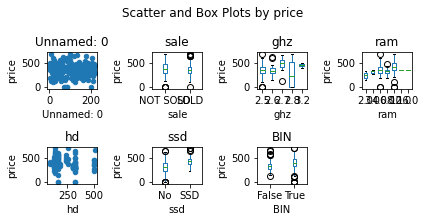

In [32]:
def draw_outcome_plots(df, outcome, n_rows, n_cols):
    fig=plt.figure()
    variables = df.columns.drop(outcome)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        if len(df[var_name].unique()) > 10:
            df.plot.scatter(x= var_name, y= outcome, ax=ax)
        else:
            df.boxplot(column=outcome, by=var_name, grid = False, ax=ax)
        ax.set(ylabel=outcome)
        ax.set_title(var_name)
    fig.suptitle('Scatter and Box Plots by '+outcome)
    fig.tight_layout()
    plt.show()
draw_outcome_plots(data, 'price', 3, 4)

In [12]:
data.plot.(x="price", y="hd")

TypeError: no numeric data to plot

In [34]:
data["ssd"] = data["ssd"].astype("category")

<AxesSubplot:title={'center':'hd'}, xlabel='[ssd]'>

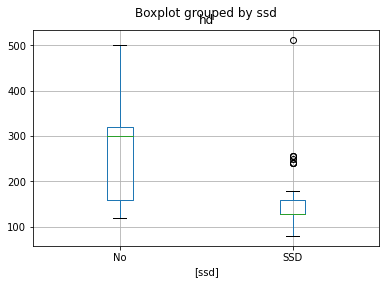

In [35]:
data.boxplot(column="hd", by=["ssd"])

In [19]:
data["hd"].value_counts()

128.0    57
320.0    27
160.0    24
300.0    10
120.0     7
500.0     7
240.0     4
256.0     3
80.0      2
119.0     2
130.0     2
180.0     2
150.0     1
250.0     1
512.0     1
Name: hd, dtype: int64

In [36]:
data.corr()

,Unnamed: 0,price,ghz,ram,BIN
Unnamed: 0,1.000000,-0.022537,0.152105,-0.094888,-0.153466
price,-0.022537,1.000000,0.200020,0.210697,0.173600
ghz,0.152105,0.200020,1.000000,0.341011,-0.007366
ram,-0.094888,0.210697,0.341011,1.000000,-0.018053
BIN,-0.153466,0.173600,-0.007366,-0.018053,1.000000
